# BERT Base -  Augmented Data - Filtered Data

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
datasetPath = "/content/drive/MyDrive/Thesis/Code/GenerativeDataAugmentation/Coba14/filteredData/augJoin3.csv"
dataset = pd.read_csv(datasetPath, index_col=0, encoding="utf-8")
dataset.rename(columns={'text' : 'Text', 'emotion' : 'Emotion'}, inplace=True)

In [3]:
dataset

,Text,Emotion
0,im not talking about a studio. im talking abou...,anger
1,. . . Wait a fucking second,anger
2,"Oh [NAME], someone did it already, and it was ...",surprise
3,see im on here having fun meming on all yall b...,joy
4,Yeah - thanks - I vaguely remember this. I won...,surprise
...,...,...
78005,Soon: Mass death of pink-skinned Aussies.,disgust
78006,Ohhh sorry. I got it now. Thanks bruv,joy
78007,"Don't listen to the idiot, we love your posts!",anger
78008,i can feel more emotional now,sadness


In [4]:
dataset['Emotion'].value_counts()

joy         14744
sadness     14168
fear        13037
anger       12987
surprise    12330
disgust     10744
Name: Emotion, dtype: int64

In [5]:
encoded_dict = {'anger':0, 'fear':1, 'joy':2, 'disgust':3, 'sadness':4, 'surprise':5}
dataset['Emotion'] = dataset.Emotion.map(encoded_dict)

In [6]:
dataset

,Text,Emotion
0,im not talking about a studio. im talking abou...,0
1,. . . Wait a fucking second,0
2,"Oh [NAME], someone did it already, and it was ...",5
3,see im on here having fun meming on all yall b...,2
4,Yeah - thanks - I vaguely remember this. I won...,5
...,...,...
78005,Soon: Mass death of pink-skinned Aussies.,3
78006,Ohhh sorry. I got it now. Thanks bruv,2
78007,"Don't listen to the idiot, we love your posts!",0
78008,i can feel more emotional now,4


In [7]:
import numpy as np
training_data, validation_data, test_data = np.split(dataset.sample(frac=1), [int(.8*len(dataset)), int(.9*len(dataset))])

In [8]:
training_data = training_data.reset_index().drop(['index'], axis=1)

In [9]:
training_data

,Text,Emotion
0,i love the feeling of something strange and u...,1
1,i am comforted knowing that i can use my gun f...,1
2,I just have high standards for that and I'm ap...,3
3,Today's Recaptchas were fun. I'm very good at ...,2
4,Get out. And take your facts with you.,0
...,...,...
62403,You're didn't vote for her you are obviously a...,3
62404,i joke about her leaving me or tell her that i...,1
62405,i feel frightened for my own child,1
62406,i was feeling rather self satisfied that my te...,2


In [10]:
training_data['Emotion'].value_counts()

2    11809
4    11313
0    10398
1    10397
5     9883
3     8608
Name: Emotion, dtype: int64

In [11]:
validation_data = validation_data.reset_index().drop(['index'], axis=1)

In [12]:
validation_data

,Text,Emotion
0,Minus the eyebrows I personally think it’s an ...,0
1,i dont know how i feel its strange,1
2,"Yeah, all the areas in question have shitty wa...",3
3,That's ignorant as all hell. Tell them to buy ...,0
4,I like this a lot,2
...,...,...
7796,hahaha [NAME]???,2
7797,i still feel nervous,1
7798,i often feel like a child here i speak the lan...,1
7799,i really dont think seriously happy and focuse...,0


In [13]:
validation_data['Emotion'].value_counts()

2    1471
4    1437
1    1355
0    1248
5    1229
3    1061
Name: Emotion, dtype: int64

In [14]:
test_data = test_data.reset_index().drop(['index'], axis=1)

In [15]:
test_data

,Text,Emotion
0,im feeling a little bit shaky and hungry righ...,1
1,ive always been intimidated by the idea of ta...,1
2,i could feel my heart break,4
3,"When he finally does show up in the flesh, he ...",3
4,i guess ill quit the predictions and quit feel...,4
...,...,...
7796,"Unfortunately, we do not routinely keep 20 lit...",4
7797,I’m interested!,2
7798,i just say the things that i want without even...,0
7799,I feel like people kind of just... forgot abou...,2


In [16]:
test_data['Emotion'].value_counts()

2    1464
4    1418
0    1341
1    1285
5    1218
3    1075
Name: Emotion, dtype: int64

# Model 

In [17]:
training_data.shape, test_data.shape, validation_data.shape

((62408, 2), (7801, 2), (7801, 2))

In [18]:
!pip install transformers==4.18.0
import transformers
print(transformers.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 29.6 MB/s 
     |████████████████████████████████| 880 kB 76.7 MB/s 
     |████████████████████████████████| 182 kB 82.3 MB/s 
     |████████████████████████████████| 6.6 MB 78.8 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=185d81d691a4d1ab48fa2f4eccb599152cac7b9a8218a71f6ac01e0685897830
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
4.18.0


In [19]:
# Tentukan pre-trained model yang akan digunakan untuk fine-tuning
# Daftar model dapat ditemukan pada https://huggingface.co

PRE_TRAINED_MODEL = 'bert-base-cased'

In [20]:
from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL)  # Load tokenizer dari pre-trained model

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [21]:
# Contoh Tokenisasi

id_data = 5 # Mengambil data indeks ke-5 pada dataframe

print('Kalimat:', test_data.Text[id_data])
print('BERT Tokenizer:', bert_tokenizer.tokenize(test_data.Text[id_data]))

Kalimat: OMG, that show is actually doing really well! 🤣
BERT Tokenizer: ['O', '##MG', ',', 'that', 'show', 'is', 'actually', 'doing', 'really', 'well', '!', '[UNK]']


In [22]:
# Contoh input formatting untuk BERT. Input formating dapat menggunakan fungsi `encode_plus`

bert_input = bert_tokenizer.encode_plus(
    training_data.Text[id_data],    # Sample kalimat                
    add_special_tokens = True,      # Tambahkan token [CLS] pada awal kalimat dan token [SEP] pada akhir kalimat
    padding = 'max_length',         # Tambahkan padding ke max_length menggunakan token [PAD] jika kalimat kurang dari max_length
    truncation = 'longest_first',   # Truncate jika kalimat lebih dari max_length
    max_length = 100,               # Tentukan max_length dari seluruh kalimat
    return_attention_mask = True,   # Mengembalikan nilai attention mask
    return_token_type_ids =True     # Mengembalikan nilai token type id (segment embedding)
    )

# Fungsi `encode_plus` mengembalikan 3 nilai: input_ids, token_type_ids, attention_mask
bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [23]:
print('Kalimat\t\t:', training_data.Text[id_data])                                      # Data asli
print('Tokenizer\t:', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))    # Hasil input formatting + tokenizer
print('Input IDs\t:', bert_input['input_ids'])                                          # Input IDs : indeks token pada vocabulary tokenizer
print('Token Type IDs\t:', bert_input['token_type_ids'])                                # Token type IDs : menunjukkan urutan kalimat pada sequence (segment embedding)
print('Attention Mask\t:', bert_input['attention_mask'])                                # Attention mask : mengembalikan nilai [0,1]. 1 artinya token yang di masking, 0 token yang tidak di masking (diabaikan)

Kalimat		: Doesn't change the fact that they shadowbanned a subreddit. Just because YOU think it's stupid doesn't make that ok.
Tokenizer	: ['[CLS]', 'Doesn', "'", 't', 'change', 'the', 'fact', 'that', 'they', 'shadow', '##ban', '##ned', 'a', 'sub', '##red', '##dit', '.', 'Just', 'because', 'YOU', 'think', 'it', "'", 's', 'stupid', 'doesn', "'", 't', 'make', 'that', 'ok', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Input ID

In [24]:
import random
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

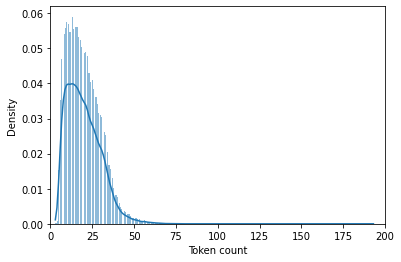

In [25]:
'''
Ada banyak cara untuk menentukan max_length
Intuisinya adalah kita tidak ingin memotong kalimat, atau terlalu banyak menambahkan padding (komputasi lebih lama)
Contoh ini, max_lenght ditentukan dari distribusi token pada dataset 
'''
token_lens = []

for txt in training_data.Text:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))

sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 200]);
plt.xlabel('Token count');

In [26]:
# Dapat dilihat dari grafik diatas, sebagian besar kalimat tampaknya berisi kurang dari 80 token
# Maka, tentukan max_length adalah 80

MAX_LEN = 100

In [27]:
# Buat fungsi untuk menggabungkan langkah tokenisasi, menambahkan special tokens untuk keseluruhan data sebagai input formatting ke model BERT
def convert_example_to_feature(sentence):  
  return bert_tokenizer.encode_plus(
      sentence, 
      add_special_tokens = True, 
      padding = 'max_length',
      truncation = 'longest_first',
      max_length = MAX_LEN, 
      return_attention_mask = True, 
      return_token_type_ids=True
    )

In [28]:
# Buat fungsi untuk memetakan input hasil input formatting agar sesuai dengan model BERT
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [29]:
!pip install tensorflow==2.8.0
import tensorflow as tf
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 18 kB/s 
     |████████████████████████████████| 462 kB 28.4 MB/s 
     |████████████████████████████████| 1.4 MB 65.4 MB/s 
     |████████████████████████████████| 5.8 MB 50.6 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
2.8.0


In [30]:
# Buat fungsi untuk iterasi pada setiap kalimat pada keseluruhan data
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
    
  for sentence, label in data.to_numpy():

    bert_input = convert_example_to_feature(sentence)
  
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

# Fine Tuning

In [31]:
# Tentukan nilai hyperparamter untuk fine-tuning
EPOCHS = 5
BATCH_SIZE = 16
LEARNING_RATE = 5e-5

In [32]:
# Lakukan input formatting menggunakan fungsi sebelumnya pada data keseluruhan data
train_encoded = encode(training_data).batch(BATCH_SIZE)
test_encoded = encode(test_data).batch(BATCH_SIZE)
val_encoded = encode(validation_data).batch(BATCH_SIZE)

In [33]:
'''
BERT untuk tugas klasifikasi sequence (teks) dengan menambahkan linear layer di atas pooled output untuk pengklasifikasi
https://huggingface.co/docs/transformers/model_doc/bert#transformers.TFBertForSequenceClassification
'''

from transformers import TFBertForSequenceClassification

# Load model
bert_model = TFBertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL, num_labels=6)

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
# Tentukan optimizer dengan learning rate tertentu
# Paper aslinya menggunakan Adam Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# Karena tidak menggunakan one-hot vectors, sehingga loss function dapat menggunakan sparse categorical cross entropy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# Compile model
bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [35]:
%%time
bert_history = bert_model.fit(train_encoded, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_encoded)

Epoch 1/5
3901/3901 [==============================] - 1399s 354ms/step - loss: 0.6718 - accuracy: 0.7721 - val_loss: 0.5922 - val_accuracy: 0.7911
Epoch 2/5
3901/3901 [==============================] - 1379s 353ms/step - loss: 0.5089 - accuracy: 0.8265 - val_loss: 0.6083 - val_accuracy: 0.7903
Epoch 3/5
3901/3901 [==============================] - 1379s 353ms/step - loss: 0.4249 - accuracy: 0.8536 - val_loss: 0.6182 - val_accuracy: 0.8009
Epoch 4/5
3901/3901 [==============================] - 1380s 354ms/step - loss: 0.3622 - accuracy: 0.8747 - val_loss: 0.6601 - val_accuracy: 0.7980
Epoch 5/5
3901/3901 [==============================] - 1380s 354ms/step - loss: 0.3138 - accuracy: 0.8920 - val_loss: 0.6839 - val_accuracy: 0.7948
CPU times: user 1h 23min 29s, sys: 14min 8s, total: 1h 37min 38s
Wall time: 1h 55min 17s


# Evaluation

In [36]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

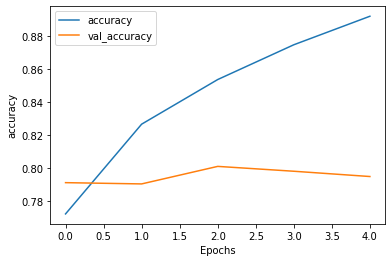

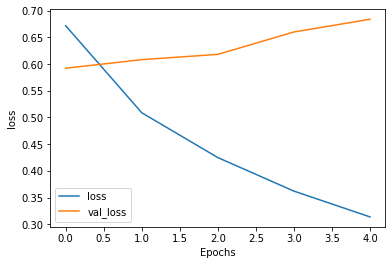

In [37]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [38]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCHS):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i], bert_history.history['loss'][i], bert_history.history['val_accuracy'][i], bert_history.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.772080 	   0.671792 	   0.791052 	   0.592185
       2   0.826545 	   0.508857 	   0.790283 	   0.608257
       3   0.853625 	   0.424900 	   0.800923 	   0.618160
       4   0.874728 	   0.362156 	   0.797975 	   0.660057
       5   0.892033 	   0.313845 	   0.794770 	   0.683899


In [39]:
score = bert_model.evaluate(test_encoded)

print("Test Accuracy:", score[1])

488/488 [==============================] - 59s 122ms/step - loss: 0.6812 - accuracy: 0.7939
Test Accuracy: 0.793872594833374


In [ ]:
predicted_raw = bert_model.predict(test_encoded)

In [ ]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(test_data['Emotion'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

0.7964747654070504

In [ ]:
confusion_matrix(y_true, y_pred)

array([[ 961,   29,   37,  149,   42,   52],
       [  63, 1166,   15,   65,   54,   39],
       [  29,    8, 1318,   21,   29,   75],
       [ 161,   54,   22,  715,   48,   49],
       [ 119,   42,   57,   63, 1159,   42],
       [  52,   40,   77,   50,   22,  962]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1270
           1       0.87      0.83      0.85      1402
           2       0.86      0.89      0.88      1480
           3       0.67      0.68      0.68      1049
           4       0.86      0.78      0.82      1482
           5       0.79      0.80      0.79      1203

    accuracy                           0.80      7886
   macro avg       0.79      0.79      0.79      7886
weighted avg       0.80      0.80      0.80      7886

